# NLP Pipeline Exploration
This notebook explores the dataset and model behavior by visualizing vocabulary features and inspecting misclassifications.

In [1]:
# Paths (relative to notebooks/)
joblib_output_dir = "../tmp/"
model_output_dir = "../models/"
metrics_output_dir = "../metrics/"


## 1. Load Processed Data and Model

In [2]:
from joblib import load

X = load(joblib_output_dir + "X.joblib")
y = load(joblib_output_dir + "y.joblib")
corpus = load(joblib_output_dir + "corpus_processed.joblib")
cv = load(joblib_output_dir + "cv.joblib")
model = load(joblib_output_dir + "model.joblib")

print(f"Shape of X: {X.shape}")
print(f"Sample corpus: {corpus[:2]}")


Shape of X: (899, 1420)
Sample corpus: ['wow love place', 'crust not good']


## 2. Label Distribution

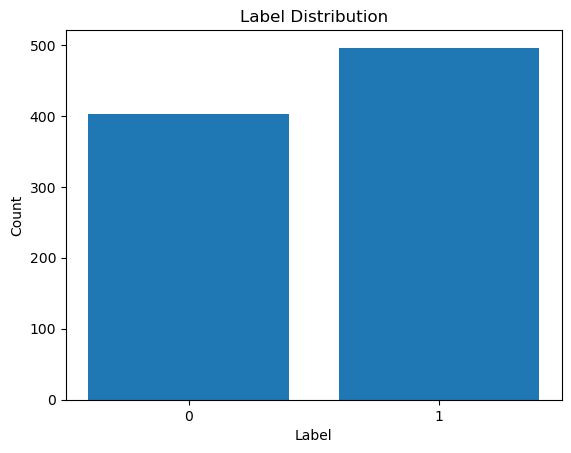

In [3]:
import matplotlib.pyplot as plt
import numpy as np

labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, tick_label=[str(label) for label in labels])
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


## 3. Vocabulary and Feature Frequency

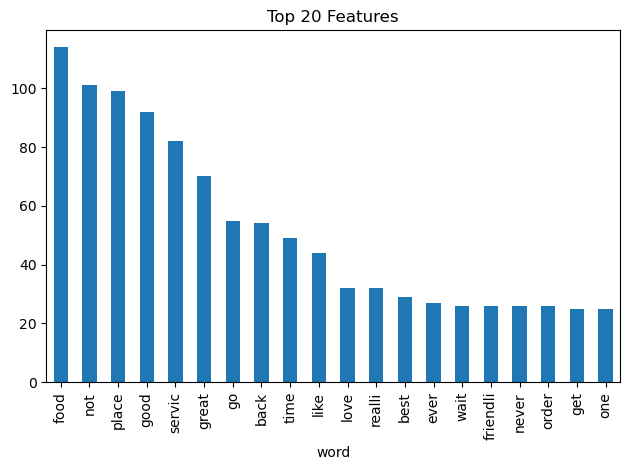

In [4]:
import pandas as pd

vocab = cv.get_feature_names_out()
X_sum = X.sum(axis=0)

vocab_freq = pd.DataFrame({
    "word": vocab,
    "count": X_sum
}).sort_values(by="count", ascending=False)

vocab_freq.head(20).plot.bar(x="word", y="count", legend=False, title="Top 20 Features")
plt.tight_layout()
plt.show()


## 4. Misclassification Analysis

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X)
misclassified_indices = (y != y_pred)

print(f"Accuracy: {accuracy_score(y, y_pred):.3f}")
print(f"Total misclassified: {misclassified_indices.sum()}")

# Show 5 misclassified samples
for idx in np.where(misclassified_indices)[0][:5]:
    print(f"Text: {corpus[idx]}")
    print(f"True: {y[idx]}, Predicted: {y_pred[idx]}")
    print("---")


Accuracy: 0.839
Total misclassified: 145
Text: not tasti textur nasti
True: 0, Predicted: 1
---
Text: servic prompt
True: 1, Predicted: 0
---
Text: food amaz
True: 1, Predicted: 0
---
Text: could care less interior beauti
True: 1, Predicted: 0
---
Text: right red velvet cake ohhh stuff good
True: 1, Predicted: 0
---


## 5. Feature Presence in Misclassified Samples 

In [6]:
# Check which top features appear in misclassified texts
top_features = vocab_freq['word'].values[:10]
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Top feature presence in misclassified examples:")
for idx in np.where(misclassified_indices)[0][:5]:
    tokens = set(corpus[idx].split())
    found = [w for w in top_features if w in tokens and w not in ENGLISH_STOP_WORDS]
    print(f"Text: {corpus[idx]}")
    print(f"Matched features: {found}")
    print("---")


Top feature presence in misclassified examples:
Text: not tasti textur nasti
Matched features: []
---
Text: servic prompt
Matched features: ['servic']
---
Text: food amaz
Matched features: ['food']
---
Text: could care less interior beauti
Matched features: []
---
Text: right red velvet cake ohhh stuff good
Matched features: ['good']
---
